## Libraries

In [1]:
# Importing Libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#suppress scientific notation in pandas
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [2]:
# Loading additional libraries.
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, recall_score, precision_score, mean_squared_error
from sklearn.model_selection import train_test_split
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout, LSTM , Activation
from keras.utils import pad_sequences
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#!pip install tsfresh # This is for installing tsfresh utilities.

In [263]:
# Additional Libraries
from sklearn.metrics import r2_score

## Loading and importing datasets of : Daily activity, Calories per hour, intensity activities, slee time per day, and weight information.

In [3]:
# Importing and loading DailyActivity data into variable : df_dly_activity.
df_dly_activity = pd.read_csv('/content/sample_data/dailyActivity_merged.csv', sep =',')
# Importing and loading sleepDay data into variable: df_sleep
df_sleep = pd.read_csv('/content/sample_data/sleepDay_merged.csv', sep =',')
# Importing and loading weight into variable: df_weight
df_weight = pd.read_csv('/content/sample_data/weightLogInfo_merged.csv', sep =',')


## Processing and cleaning data.

### Checking for emtpy Data in each of the files.

<Axes: >

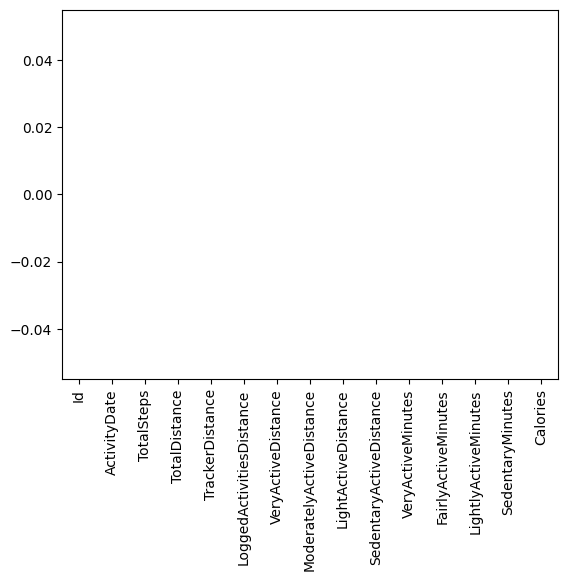

In [4]:
# There is no missing data in the file : dailyActivity.
df_dly_activity.isna().sum().plot.bar()

<Axes: >

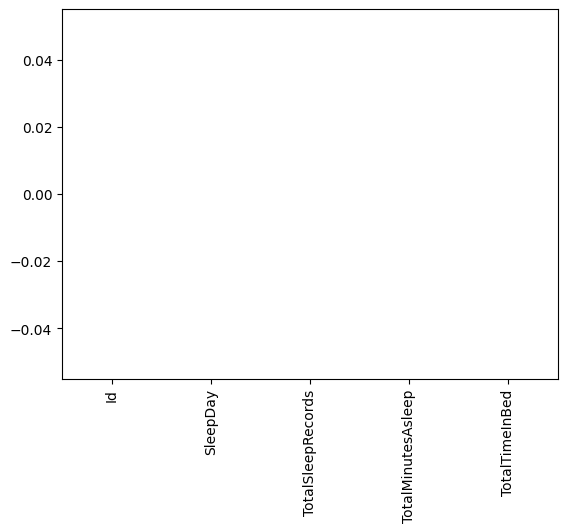

In [5]:
# There is no missing data in the file : sleep.
df_sleep.isna().sum().plot.bar()

<Axes: >

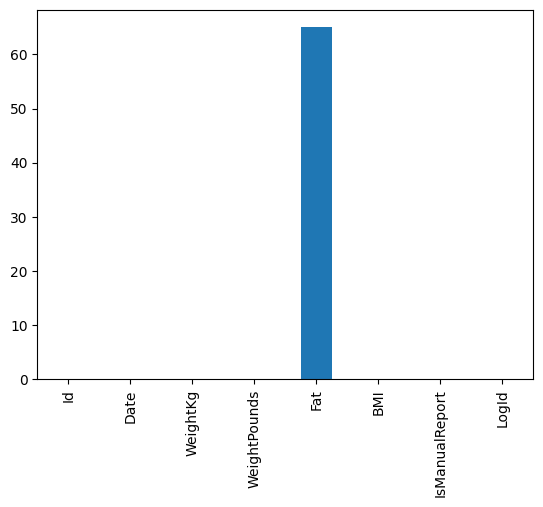

In [6]:
# There is  missing data in the file : weight.
df_weight.isna().sum().plot.bar()

### Displaying a summary of the data and verifying dtypes.

In [7]:
df_dly_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50000,8.50000,0.00000,1.88000,0.55000,6.06000,0.00000,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97000,6.97000,0.00000,1.57000,0.69000,4.71000,0.00000,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74000,6.74000,0.00000,2.44000,0.40000,3.91000,0.00000,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28000,6.28000,0.00000,2.14000,1.26000,2.83000,0.00000,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16000,8.16000,0.00000,2.71000,0.41000,5.04000,0.00000,36,10,221,773,1863


In [8]:
df_dly_activity.info()  # Checking the Dtypes of each variables in the daily activity. We need to convert "ActivityDate" into "Datetime" dtype.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [9]:
df_sleep.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [10]:
df_sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


In [11]:
df_weight.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.60000,115.96315,22.00000,22.65000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.60000,115.96315,NaN,22.65000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.50000,294.31712,NaN,47.54000,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.70000,125.00210,NaN,21.45000,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.30000,126.32487,NaN,21.69000,True,1463097599000


In [12]:
df_weight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              67 non-null     int64  
 1   Date            67 non-null     object 
 2   WeightKg        67 non-null     float64
 3   WeightPounds    67 non-null     float64
 4   Fat             2 non-null      float64
 5   BMI             67 non-null     float64
 6   IsManualReport  67 non-null     bool   
 7   LogId           67 non-null     int64  
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 3.9+ KB


### Converting Dates variables for each of the csv previously imported into the right format.

In [13]:
df_dly_activity['ActivityDate'] = pd.to_datetime(df_dly_activity['ActivityDate'], format = '%m/%d/%Y')
df_dly_activity.info()  # Verifying conversion.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

In [14]:
df_dly_activity.head() #Displaying new format.

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.50000,8.50000,0.00000,1.88000,0.55000,6.06000,0.00000,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.97000,6.97000,0.00000,1.57000,0.69000,4.71000,0.00000,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.74000,6.74000,0.00000,2.44000,0.40000,3.91000,0.00000,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.28000,6.28000,0.00000,2.14000,1.26000,2.83000,0.00000,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.16000,8.16000,0.00000,2.71000,0.41000,5.04000,0.00000,36,10,221,773,1863


In [15]:
# Dropping 'TrackerDistance', 'LoggedActivitiesDistance' from "df_dly_activity" dataset.
df_dly_activity.drop(['TrackerDistance', 'LoggedActivitiesDistance'], axis=1, inplace=True
                     )
df_dly_activity

,Id,ActivityDate,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.50000,1.88000,0.55000,6.06000,0.00000,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.97000,1.57000,0.69000,4.71000,0.00000,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.74000,2.44000,0.40000,3.91000,0.00000,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.28000,2.14000,1.26000,2.83000,0.00000,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.16000,2.71000,0.41000,5.04000,0.00000,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,10686,8.11000,1.08000,0.20000,6.80000,0.00000,17,4,245,1174,2847
936,8877689391,2016-05-09,20226,18.25000,11.10000,0.80000,6.24000,0.05000,73,19,217,1131,3710
937,8877689391,2016-05-10,10733,8.15000,1.35000,0.46000,6.28000,0.00000,18,11,224,1187,2832
938,8877689391,2016-05-11,21420,19.56000,13.22000,0.41000,5.89000,0.00000,88,12,213,1127,3832


In [16]:
# Repeating the same steps with sleep. Converting "SleepDay" into datatime dtype.
df_sleep['SleepDay'] = pd.to_datetime(df_sleep['SleepDay'])
df_sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Id                  413 non-null    int64         
 1   SleepDay            413 non-null    datetime64[ns]
 2   TotalSleepRecords   413 non-null    int64         
 3   TotalMinutesAsleep  413 non-null    int64         
 4   TotalTimeInBed      413 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 16.3 KB


In [17]:
df_sleep.head() #Displaying new format.

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,1,327,346
1,1503960366,2016-04-13,2,384,407
2,1503960366,2016-04-15,1,412,442
3,1503960366,2016-04-16,2,340,367
4,1503960366,2016-04-17,1,700,712


In [18]:
# Repeating the same steps with weight. Converting "Date" into datatime dtype.
# Renaming "Date" column from "df_weight" dataset to match "Date_merged"
df_weight.rename(columns={'Date': 'Date_merged'}, inplace=True)
df_weight['Date_merged'] = pd.to_datetime(df_weight['Date_merged'], format='%m/%d/%Y %I:%M:%S %p').dt.strftime('%m/%d/%Y')
df_weight['Date_merged'] = df_weight['Date_merged'].astype('datetime64[ns]')
df_weight['Id'] = df_weight['Id'].astype('int64')
df_weight = df_weight[['Id', 'Date_merged', 'WeightKg', 'WeightPounds', 'Fat', 'BMI']]

In [19]:
df_weight.head() #Displaying new format.

,Id,Date_merged,WeightKg,WeightPounds,Fat,BMI
0,1503960366,2016-05-02,52.60000,115.96315,22.00000,22.65000
1,1503960366,2016-05-03,52.60000,115.96315,NaN,22.65000
2,1927972279,2016-04-13,133.50000,294.31712,NaN,47.54000
3,2873212765,2016-04-21,56.70000,125.00210,NaN,21.45000
4,2873212765,2016-05-12,57.30000,126.32487,NaN,21.69000


### Checking for the number of unique IDs per dataset previously imported.

In [20]:
df_dly_activity['Id'].nunique()

33

In [21]:
df_sleep['Id'].nunique()

24

In [22]:
df_weight['Id'].nunique()

8

### Merging datasets into one solidifed dataset.

In [23]:
# Renaming "ActivityDate" column from the "df_dly_activity" to match Date_merged
df_dly_activity.rename(columns={'ActivityDate': 'Date_merged'}, inplace=True)



In [24]:
df_dly_activity.head() # Displaying new format.

,Id,Date_merged,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.50000,1.88000,0.55000,6.06000,0.00000,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.97000,1.57000,0.69000,4.71000,0.00000,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.74000,2.44000,0.40000,3.91000,0.00000,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.28000,2.14000,1.26000,2.83000,0.00000,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.16000,2.71000,0.41000,5.04000,0.00000,36,10,221,773,1863


In [25]:
# Renaming "SleepDay" column from the "df_sleep" dataset to match "Date_merged"
df_sleep.rename(columns={'SleepDay': 'Date_merged'}, inplace=True)

In [26]:
df_sleep.head() # Displaying new format.

,Id,Date_merged,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,1,327,346
1,1503960366,2016-04-13,2,384,407
2,1503960366,2016-04-15,1,412,442
3,1503960366,2016-04-16,2,340,367
4,1503960366,2016-04-17,1,700,712


In [29]:
# Proceeding to merge all dataframes into one consolidated named "df_merged"
df_merged = pd.merge(df_dly_activity, df_sleep, on=['Id','Date_merged'], how='outer')
df_merged = pd.merge(df_merged, df_weight, on=['Id','Date_merged'], how='outer')

In [31]:
df_merged.head() # Displaying  new merged dataset.

,Id,Date_merged,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,WeightKg,WeightPounds,Fat,BMI
0,1503960366,2016-04-12,13162,8.50000,1.88000,0.55000,6.06000,0.00000,25,13,328,728,1985,1.00000,327.00000,346.00000,NaN,NaN,NaN,NaN
1,1503960366,2016-04-13,10735,6.97000,1.57000,0.69000,4.71000,0.00000,21,19,217,776,1797,2.00000,384.00000,407.00000,NaN,NaN,NaN,NaN
2,1503960366,2016-04-14,10460,6.74000,2.44000,0.40000,3.91000,0.00000,30,11,181,1218,1776,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1503960366,2016-04-15,9762,6.28000,2.14000,1.26000,2.83000,0.00000,29,34,209,726,1745,1.00000,412.00000,442.00000,NaN,NaN,NaN,NaN
4,1503960366,2016-04-16,12669,8.16000,2.71000,0.41000,5.04000,0.00000,36,10,221,773,1863,2.00000,340.00000,367.00000,NaN,NaN,NaN,NaN


In [32]:
df_merged.info() # Verifying dtypes.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 943 entries, 0 to 942
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        943 non-null    int64         
 1   Date_merged               943 non-null    datetime64[ns]
 2   TotalSteps                943 non-null    int64         
 3   TotalDistance             943 non-null    float64       
 4   VeryActiveDistance        943 non-null    float64       
 5   ModeratelyActiveDistance  943 non-null    float64       
 6   LightActiveDistance       943 non-null    float64       
 7   SedentaryActiveDistance   943 non-null    float64       
 8   VeryActiveMinutes         943 non-null    int64         
 9   FairlyActiveMinutes       943 non-null    int64         
 10  LightlyActiveMinutes      943 non-null    int64         
 11  SedentaryMinutes          943 non-null    int64         
 12  Calories              

In [35]:
# Interpolating missing values.
df_merged= df_merged.fillna(0)

In [36]:
for colum in df_merged.columns:
    if df_merged[colum].isna().any():
      df_merged[colum] = df_merged[colum].interpolate(method='cubic')

In [37]:
# Chaging dtypes for all columns except "ID" and "Date_merged"
df_merged= df_merged.astype({colum: 'float64' for colum in df_merged.columns if colum not in ['Id', 'Date_merged']})

In [38]:
# Setting Date_merged and Id as index and sort data of the dataset.
df_merged.set_index(['Id', 'Date_merged'], inplace=True)
df_merged.sort_index(inplace=True)
df_merged.head()
#

TotalSteps  TotalDistance  VeryActiveDistance  \
Id         Date_merged                                                  
1503960366 2016-04-12  13162.00000        8.50000             1.88000   
           2016-04-13  10735.00000        6.97000             1.57000   
           2016-04-14  10460.00000        6.74000             2.44000   
           2016-04-15   9762.00000        6.28000             2.14000   
           2016-04-16  12669.00000        8.16000             2.71000   

                        ModeratelyActiveDistance  LightActiveDistance  \
Id         Date_merged                                                  
1503960366 2016-04-12                    0.55000              6.06000   
           2016-04-13                    0.69000              4.71000   
           2016-04-14                    0.40000              3.91000   
           2016-04-15                    1.26000              2.83000   
           2016-04-16                    0.41000              5.04000   

                        SedentaryActiveDistance  VeryActiveMinutes  \
Id         Date_merged                                               
1503960366 2016-04-12                   0.00000           25.00000   
           2016-04-13                   0.00000           21.00000   
           2016-04-14                   0.00000           30.00000   
           2016-04-15                   0.00000           29.00000   
           2016-04-16                   0.00000           36.00000   

                        FairlyActiveMinutes  LightlyActiveMinutes  \
Id         Date_merged                                              
1503960366 2016-04-12              13.00000             328.00000   
           2016-04-13              19.00000             217.00000   
           2016-04-14              11.00000             181.00000   
           2016-04-15              34.00000             209.00000   
           2016-04-16              10.00000             221.00000   

                        SedentaryMinutes   Calories  TotalSleepRecords  \
Id         Date_merged                                                   
1503960366 2016-04-12          728.00000 1985.00000            1.00000   
           2016-04-13          776.00000 1797.00000            2.00000   
           2016-04-14         1218.00000 1776.00000            0.00000   
           2016-04-15          726.00000 1745.00000            1.00000   
           2016-04-16          773.00000 1863.00000            2.00000   

                        TotalMinutesAsleep  TotalTimeInBed  WeightKg  \
Id         Date_merged                                                 
1503960366 2016-04-12            327.00000       346.00000   0.00000   
           2016-04-13            384.00000       407.00000   0.00000   
           2016-04-14              0.00000         0.00000   0.00000   
           2016-04-15            412.00000       442.00000   0.00000   
           2016-04-16            340.00000       367.00000   0.00000   

                        WeightPounds     Fat     BMI  
Id         Date_merged                                
1503960366 2016-04-12        0.00000 0.00000 0.00000  
           2016-04-13        0.00000 0.00000 0.00000  
           2016-04-14        0.00000 0.00000 0.00000  
           2016-04-15        0.00000 0.00000 0.00000  
           2016-04-16        0.00000 0.00000 0.00000

In [44]:
df_merged.dtypes

TotalSteps                  float64
TotalDistance               float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes           float64
FairlyActiveMinutes         float64
LightlyActiveMinutes        float64
SedentaryMinutes            float64
Calories                    float64
TotalSleepRecords           float64
TotalMinutesAsleep          float64
TotalTimeInBed              float64
WeightKg                    float64
WeightPounds                float64
Fat                         float64
BMI                         float64
dtype: object

### Analysis of data insights.

In [40]:
df_merged.describe()

,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,WeightKg,WeightPounds,Fat,BMI
count,943.00000,943.00000,943.00000,943.00000,943.00000,943.00000,943.00000,943.00000,943.00000,943.00000,943.00000,943.00000,943.00000,943.00000,943.00000,943.00000,943.00000,943.00000
mean,7652.18876,5.50285,1.50432,0.57088,3.34926,0.00160,21.23966,13.62884,193.02545,990.35313,2307.50795,0.48993,183.71156,200.86744,5.11813,11.28355,0.04984,1.78941
std,5086.53283,3.92651,2.65763,0.88478,2.04651,0.00734,32.94626,20.00075,109.30847,301.26247,720.81552,0.60047,222.44677,242.69016,18.87961,41.62240,1.08388,6.52442
min,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,3795.00000,2.62000,0.00000,0.00000,1.95000,0.00000,0.00000,0.00000,127.00000,729.00000,1829.50000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,7439.00000,5.26000,0.22000,0.24000,3.38000,0.00000,4.00000,7.00000,199.00000,1057.00000,2140.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
75%,10734.00000,7.72000,2.06500,0.80500,4.79000,0.00000,32.00000,19.00000,264.00000,1229.00000,2796.50000,1.00000,417.50000,450.50000,0.00000,0.00000,0.00000,0.00000
max,36019.00000,28.03000,21.92000,6.48000,10.71000,0.11000,210.00000,143.00000,518.00000,1440.00000,4900.00000,3.00000,796.00000,961.00000,133.50000,294.31712,25.00000,47.54000


- Analysis conclusions per the previous findings:

 -- In the daily activity data, we can see that mean of the total steps are: 7652.18876. Accordingly with the article : Intesity With Cancer and Cardiovascular Disease Incidence and Mortality and All- Cause Mortality ( Del Pozo Cruz, B. 2022), published at National Library of Medicine (https://pubmed.ncbi.nlm.nih.gov/36094529/). The total recommended steps per day are: 10,000 steps that is associated with a lower risk of mortality and cancer and CVD (Cardiovascular ) incidences. This can be another recommendation that can be used to encourange to users to achive a daily goal.
 -- Additionaly, we can see that the activity of "high sedentary periods" has the highest results with an average of 16 hours ( 990.35313  minutees to hours = 16.52018 hours ), and most of the activities are reflected to the (LightActiveDistance) or low intensity activities.



### Analysis graphs and plots. ( Intensity Activity vs SleepTime , Intensity activity vs Burtn Calories ).

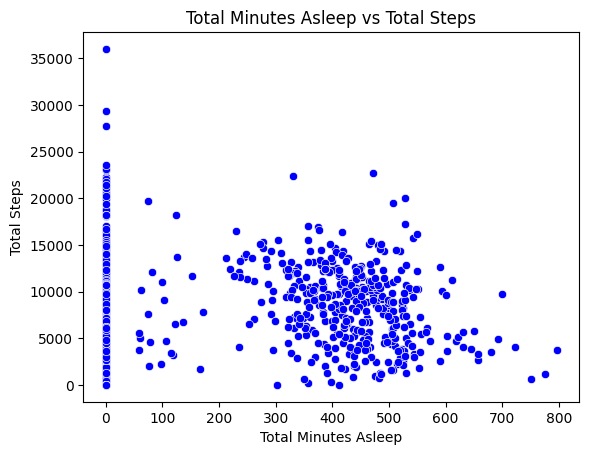

In [41]:
# Let's use Scatterplots.
sns.scatterplot(data=df_merged, x='TotalMinutesAsleep', y='TotalSteps', color ='blue')
plt.title('Total Minutes Asleep vs Total Steps')
plt.xlabel('Total Minutes Asleep')
plt.ylabel('Total Steps')
plt.show()

 - Note: from the previous scatterplot, we can identify a relationship between the 10,000 steps and the quality of the sleep time. In this case, a range from 400 to 500 minutes ( 7 to 8 hours ) are concentrated in the of 10,000 steps as the recommended target threshold.

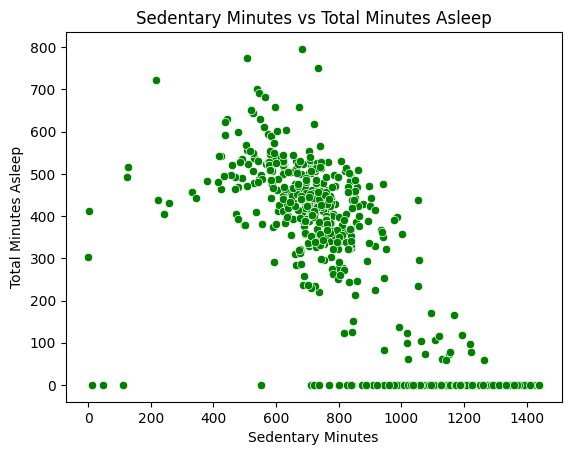

In [42]:
sns.scatterplot(data=df_merged, x='SedentaryMinutes', y='TotalMinutesAsleep', color ='green')
plt.title('Sedentary Minutes vs Total Minutes Asleep')
plt.xlabel('Sedentary Minutes')
plt.ylabel('Total Minutes Asleep')
plt.show()


- Note: there  is a relationship between low sedentary minutes (activities) and the low quality of sleep. As we can see a range of 400 to 800 minutes (6 to 13 hours )  of sedentary activity and 300 to 500 minutes (5 to 8 hours )  as total sleep time.  

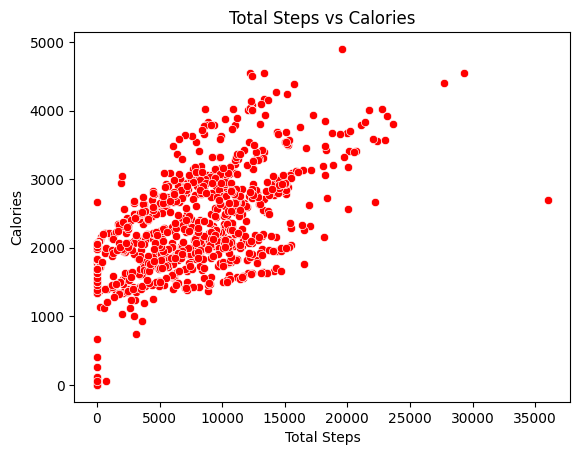

In [43]:
sns.scatterplot(data=df_merged, x='TotalSteps', y='Calories', color ='red')
plt.title('Total Steps vs Calories')
plt.xlabel('Total Steps')
plt.ylabel('Calories')
plt.show()

- Note: there is also a relationship between the daily total steps and the burnt calories.

# Summary of Analysis of the Descriptive Statistics and future App recommendation:

After completing the descriptive statistical analysis and creating various graphs, there are some strategies that can contribute to the marketing of the Vitality Fitness Tracker Pro:

- This device can complement a public routine, primarily focusing on monitoring and providing guidance for daily health benefits.

- It can be positioned as an ally for improving health, offering comprehensive tracking of steps, physical activity, hydration, and sleep.

- During the data registration process, it can notify users to input information such as steps, height, and age. This information can be used to establish objectives for hydration, daily calorie consumption, and physical activity, thereby improving the accuracy of the data.

- Another objective could be a fixed target of 10,000 steps per day and 30 minutes of moderate physical activity. Users can be encouraged to achieve this target through notifications, especially during previously observed peak times for moderate physical activity.

- The app can monitor excessive sedentary activity through notifications and alert users to reduce periods of inactivity.

# Machine Learning Model.

We are applying two models as follows:

- Model 1 : predictor variable: Calories, dependent variables: Sedentary Minutes ,and Total Steps.
- Model 2: predictor variable: Calories, dependent variables: Total minutes asleep, and Total steps.

- For both cases, we are using LSTM (Long Short Term Memory, with 30 neuros, a regularization layer adjusted to a learning rate of 0.01 , and a dense leyer as output).

Then , we are predicting the total amount of burnt Calories based on intervals of 30, 60, 80 and 90 ,minutes.

### Model 1.

In [197]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 943 entries, (1503960366, Timestamp('2016-04-12 00:00:00')) to (8877689391, Timestamp('2016-05-12 00:00:00'))
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TotalSteps                943 non-null    float64
 1   TotalDistance             943 non-null    float64
 2   VeryActiveDistance        943 non-null    float64
 3   ModeratelyActiveDistance  943 non-null    float64
 4   LightActiveDistance       943 non-null    float64
 5   SedentaryActiveDistance   943 non-null    float64
 6   VeryActiveMinutes         943 non-null    float64
 7   FairlyActiveMinutes       943 non-null    float64
 8   LightlyActiveMinutes      943 non-null    float64
 9   SedentaryMinutes          943 non-null    float64
 10  Calories                  943 non-null    float64
 11  TotalSleepRecords         943 non-null    float64
 12  TotalMinutesAsleep        943 no

In [244]:
df2= df_merged

In [245]:
df2.head()

TotalSteps  TotalDistance  VeryActiveDistance  \
Id         Date_merged                                                  
1503960366 2016-04-12  13162.00000        8.50000             1.88000   
           2016-04-13  10735.00000        6.97000             1.57000   
           2016-04-14  10460.00000        6.74000             2.44000   
           2016-04-15   9762.00000        6.28000             2.14000   
           2016-04-16  12669.00000        8.16000             2.71000   

                        ModeratelyActiveDistance  LightActiveDistance  \
Id         Date_merged                                                  
1503960366 2016-04-12                    0.55000              6.06000   
           2016-04-13                    0.69000              4.71000   
           2016-04-14                    0.40000              3.91000   
           2016-04-15                    1.26000              2.83000   
           2016-04-16                    0.41000              5.04000   

                        SedentaryActiveDistance  VeryActiveMinutes  \
Id         Date_merged                                               
1503960366 2016-04-12                   0.00000           25.00000   
           2016-04-13                   0.00000           21.00000   
           2016-04-14                   0.00000           30.00000   
           2016-04-15                   0.00000           29.00000   
           2016-04-16                   0.00000           36.00000   

                        FairlyActiveMinutes  LightlyActiveMinutes  \
Id         Date_merged                                              
1503960366 2016-04-12              13.00000             328.00000   
           2016-04-13              19.00000             217.00000   
           2016-04-14              11.00000             181.00000   
           2016-04-15              34.00000             209.00000   
           2016-04-16              10.00000             221.00000   

                        SedentaryMinutes   Calories  TotalSleepRecords  \
Id         Date_merged                                                   
1503960366 2016-04-12          728.00000 1985.00000            1.00000   
           2016-04-13          776.00000 1797.00000            2.00000   
           2016-04-14         1218.00000 1776.00000            0.00000   
           2016-04-15          726.00000 1745.00000            1.00000   
           2016-04-16          773.00000 1863.00000            2.00000   

                        TotalMinutesAsleep  TotalTimeInBed  WeightKg  \
Id         Date_merged                                                 
1503960366 2016-04-12            327.00000       346.00000   0.00000   
           2016-04-13            384.00000       407.00000   0.00000   
           2016-04-14              0.00000         0.00000   0.00000   
           2016-04-15            412.00000       442.00000   0.00000   
           2016-04-16            340.00000       367.00000   0.00000   

                        WeightPounds     Fat     BMI  
Id         Date_merged                                
1503960366 2016-04-12        0.00000 0.00000 0.00000  
           2016-04-13        0.00000 0.00000 0.00000  
           2016-04-14        0.00000 0.00000 0.00000  
           2016-04-15        0.00000 0.00000 0.00000  
           2016-04-16        0.00000 0.00000 0.00000

In [246]:
df2.shape


(943, 18)

In [247]:
df2= df2[['Calories','TotalSteps','SedentaryMinutes']]

In [248]:
df2.shape

(943, 3)

In [249]:
values = df2.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# Reshaping the data for time series forecasting
n_time_steps = 1
n_features = df2.shape[1]  # Number of features (In this case: 'Calories','TotalSteps','SedentaryMinutes')

# Creating a list to hold the reshaped arrays
reframed = []

for i in range(len(scaled) - n_time_steps + 1):
    reframed.append(scaled[i:i + n_time_steps, :])

# Convert the list to numpy array
reframed = np.array(reframed)

# Reshaping for training
n_train_time = 660  # Adjusted number of training samples
train = reframed[:n_train_time, :, :]
test = reframed[n_train_time:, :, :]

# Separating features and target for training
train_x, train_y = train[:, :, 1:], train[:, :, 0]
test_x, test_y = test[:, :, 1:], test[:, :, 0]


In [250]:
# Printing and verifying shapes.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(660, 1, 2)
(660, 1)
(283, 1, 2)
(283, 1)


Epoch 1/30
21/21 - 3s - loss: 0.1778 - val_loss: 0.2048 - 3s/epoch - 143ms/step
Epoch 2/30
21/21 - 0s - loss: 0.1078 - val_loss: 0.1259 - 108ms/epoch - 5ms/step
Epoch 3/30
21/21 - 0s - loss: 0.0586 - val_loss: 0.0696 - 114ms/epoch - 5ms/step
Epoch 4/30
21/21 - 0s - loss: 0.0293 - val_loss: 0.0380 - 124ms/epoch - 6ms/step
Epoch 5/30
21/21 - 0s - loss: 0.0192 - val_loss: 0.0255 - 116ms/epoch - 6ms/step
Epoch 6/30
21/21 - 0s - loss: 0.0176 - val_loss: 0.0219 - 115ms/epoch - 5ms/step
Epoch 7/30
21/21 - 0s - loss: 0.0181 - val_loss: 0.0210 - 112ms/epoch - 5ms/step
Epoch 8/30
21/21 - 0s - loss: 0.0184 - val_loss: 0.0210 - 111ms/epoch - 5ms/step
Epoch 9/30
21/21 - 0s - loss: 0.0182 - val_loss: 0.0206 - 159ms/epoch - 8ms/step
Epoch 10/30
21/21 - 0s - loss: 0.0178 - val_loss: 0.0201 - 113ms/epoch - 5ms/step
Epoch 11/30
21/21 - 0s - loss: 0.0178 - val_loss: 0.0197 - 118ms/epoch - 6ms/step
Epoch 12/30
21/21 - 0s - loss: 0.0169 - val_loss: 0.0192 - 118ms/epoch - 6ms/step
Epoch 13/30
21/21 - 0s - l

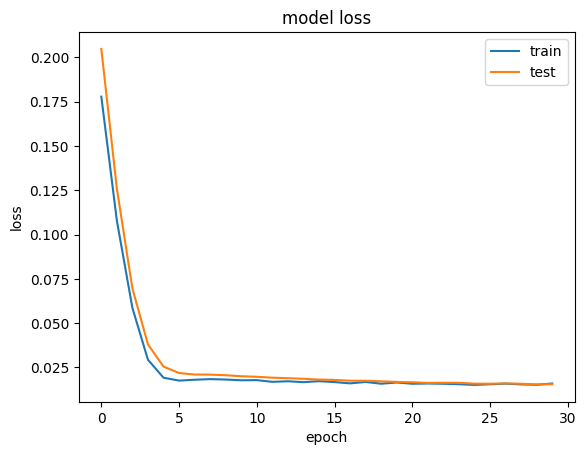

9/9 [==============================] - 0s 2ms/step
Test RMSE: 611.077


In [251]:
model = Sequential()
model.add(LSTM(30, input_shape=(train_x.shape[1], train_x.shape[2])))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Fitting model.
history = model.fit(train_x, train_y, epochs=30, validation_data=(test_x, test_y), verbose=2, shuffle=False)

# Loss history plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

size = df2.shape[1]

# Prediction test
yhat = model.predict(test_x)
test_x = test_x.reshape((test_x.shape[0], test_x.shape[2]))

# Inverting scaling for prediction
inv_yhat = np.concatenate((yhat, test_x[:, 1-size:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# Inverting  scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_x[:, 1-size:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

# Calculating RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

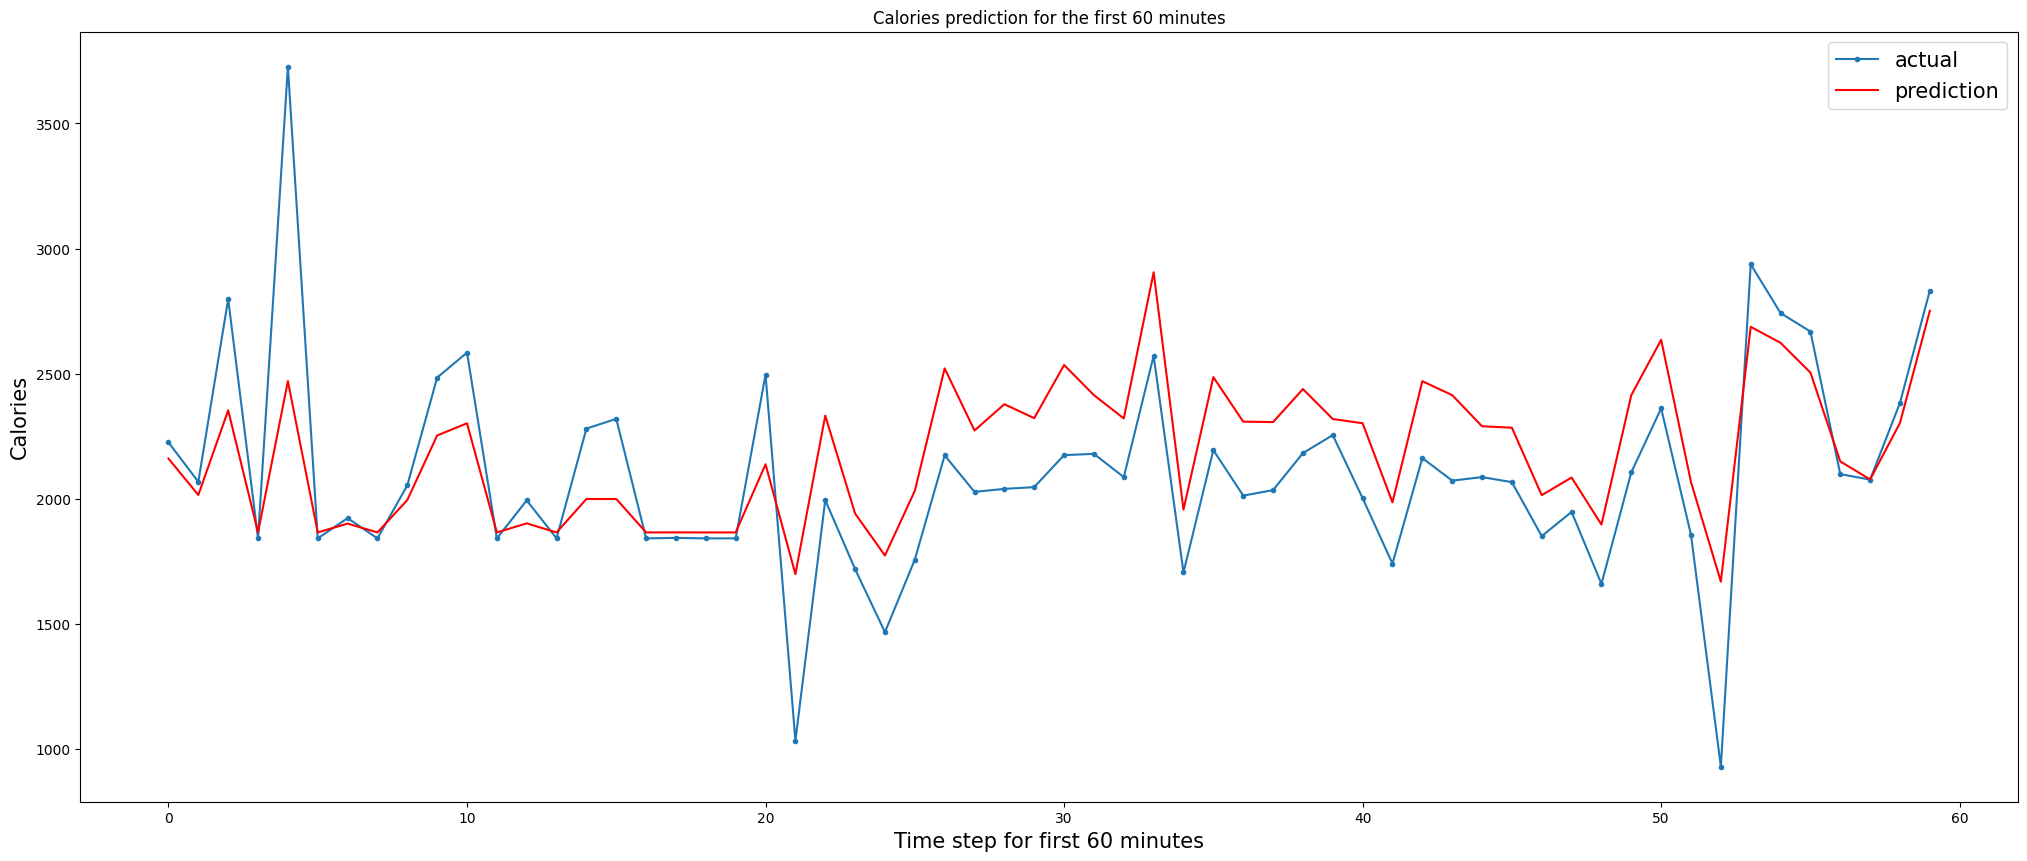

In [252]:
# Plotting calories predictions for the first 60 minutes.
aa=[x for x in range(60)]
plt.figure(figsize=(25,10))
plt.plot(aa, inv_y[:60], marker='.', label="actual")
plt.plot(aa, inv_yhat[:60], 'r', label="prediction")
plt.ylabel(df2.columns[0], size=15)
plt.xlabel('Time step for first 60 minutes', size=15)
plt.title('Calories prediction for the first 60 minutes')
plt.legend(fontsize=15)
plt.show()


In [254]:
# Defining the time intervals in minutes
time_intervals = [30, 60, 80, 90]

# Converting  time intervals to the corresponding number of time steps
time_steps_intervals = [interval for interval in time_intervals]

# Calculating the predicted calorie values for each time interval
predicted_calories_intervals = [inv_yhat[time_steps_interval] for time_steps_interval in time_steps_intervals]

# Printing the predicted calorie values for each time interval
for interval, predicted_calories in zip(time_intervals, predicted_calories_intervals):
    print(f'Predicted calories burned for the first {interval} minutes:', predicted_calories)


Predicted calories burned for the first 30 minutes: 2534.24608707428
Predicted calories burned for the first 60 minutes: 2703.4672498703003
Predicted calories burned for the first 80 minutes: 2016.547030210495
Predicted calories burned for the first 90 minutes: 2021.6683506965637


### Model 2.

In [255]:
df3= df_merged

In [256]:
df3= df3[['Calories','TotalSteps','TotalMinutesAsleep']]

In [257]:
from sklearn.preprocessing import MinMaxScaler

# Assuming df2 is your DataFrame

values = df3.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# Reshaping the data for time series forecasting
n_time_steps = 1
n_features = df3.shape[1]  # Number of features (In this case: 'Calories','TotalSteps','TotalMinutesAsleep')

# Creating a list to hold the reshaped arrays
reframed = []

for i in range(len(scaled) - n_time_steps + 1):
    reframed.append(scaled[i:i + n_time_steps, :])

# Convert the list to numpy array
reframed = np.array(reframed)

# Reshaping for training
n_train_time = 660  # Adjusted number of training samples
train = reframed[:n_train_time, :, :]
test = reframed[n_train_time:, :, :]

# Separating features and target for training
train_x, train_y = train[:, :, 1:], train[:, :, 0]
test_x, test_y = test[:, :, 1:], test[:, :, 0]


Epoch 1/30
21/21 - 3s - loss: 0.1741 - val_loss: 0.2184 - 3s/epoch - 137ms/step
Epoch 2/30
21/21 - 0s - loss: 0.1207 - val_loss: 0.1547 - 105ms/epoch - 5ms/step
Epoch 3/30
21/21 - 0s - loss: 0.0752 - val_loss: 0.1006 - 114ms/epoch - 5ms/step
Epoch 4/30
21/21 - 0s - loss: 0.0429 - val_loss: 0.0610 - 98ms/epoch - 5ms/step
Epoch 5/30
21/21 - 0s - loss: 0.0249 - val_loss: 0.0381 - 95ms/epoch - 5ms/step
Epoch 6/30
21/21 - 0s - loss: 0.0192 - val_loss: 0.0281 - 122ms/epoch - 6ms/step
Epoch 7/30
21/21 - 0s - loss: 0.0183 - val_loss: 0.0244 - 113ms/epoch - 5ms/step
Epoch 8/30
21/21 - 0s - loss: 0.0169 - val_loss: 0.0228 - 111ms/epoch - 5ms/step
Epoch 9/30
21/21 - 0s - loss: 0.0168 - val_loss: 0.0221 - 105ms/epoch - 5ms/step
Epoch 10/30
21/21 - 0s - loss: 0.0163 - val_loss: 0.0214 - 114ms/epoch - 5ms/step
Epoch 11/30
21/21 - 0s - loss: 0.0165 - val_loss: 0.0210 - 105ms/epoch - 5ms/step
Epoch 12/30
21/21 - 0s - loss: 0.0159 - val_loss: 0.0205 - 110ms/epoch - 5ms/step
Epoch 13/30
21/21 - 0s - los

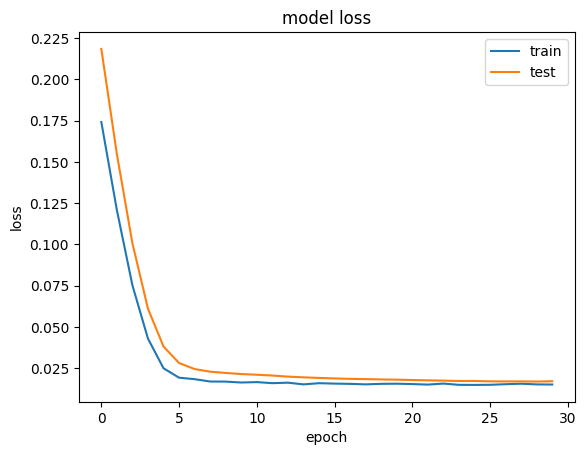

9/9 [==============================] - 0s 2ms/step
Test RMSE: 639.541


In [258]:
model = Sequential()
model.add(LSTM(30, input_shape=(train_x.shape[1], train_x.shape[2])))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Fitting model.
history = model.fit(train_x, train_y, epochs=30, validation_data=(test_x, test_y), verbose=2, shuffle=False)

# Loss history plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

size = df3.shape[1]

# Prediction test
yhat = model.predict(test_x)
test_x = test_x.reshape((test_x.shape[0], test_x.shape[2]))  # Adjusted reshape to maintain shape

# Inverting scaling for prediction
inv_yhat = np.concatenate((yhat, test_x[:, 1-size:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# Inverting  scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_x[:, 1-size:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

# Calculating RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

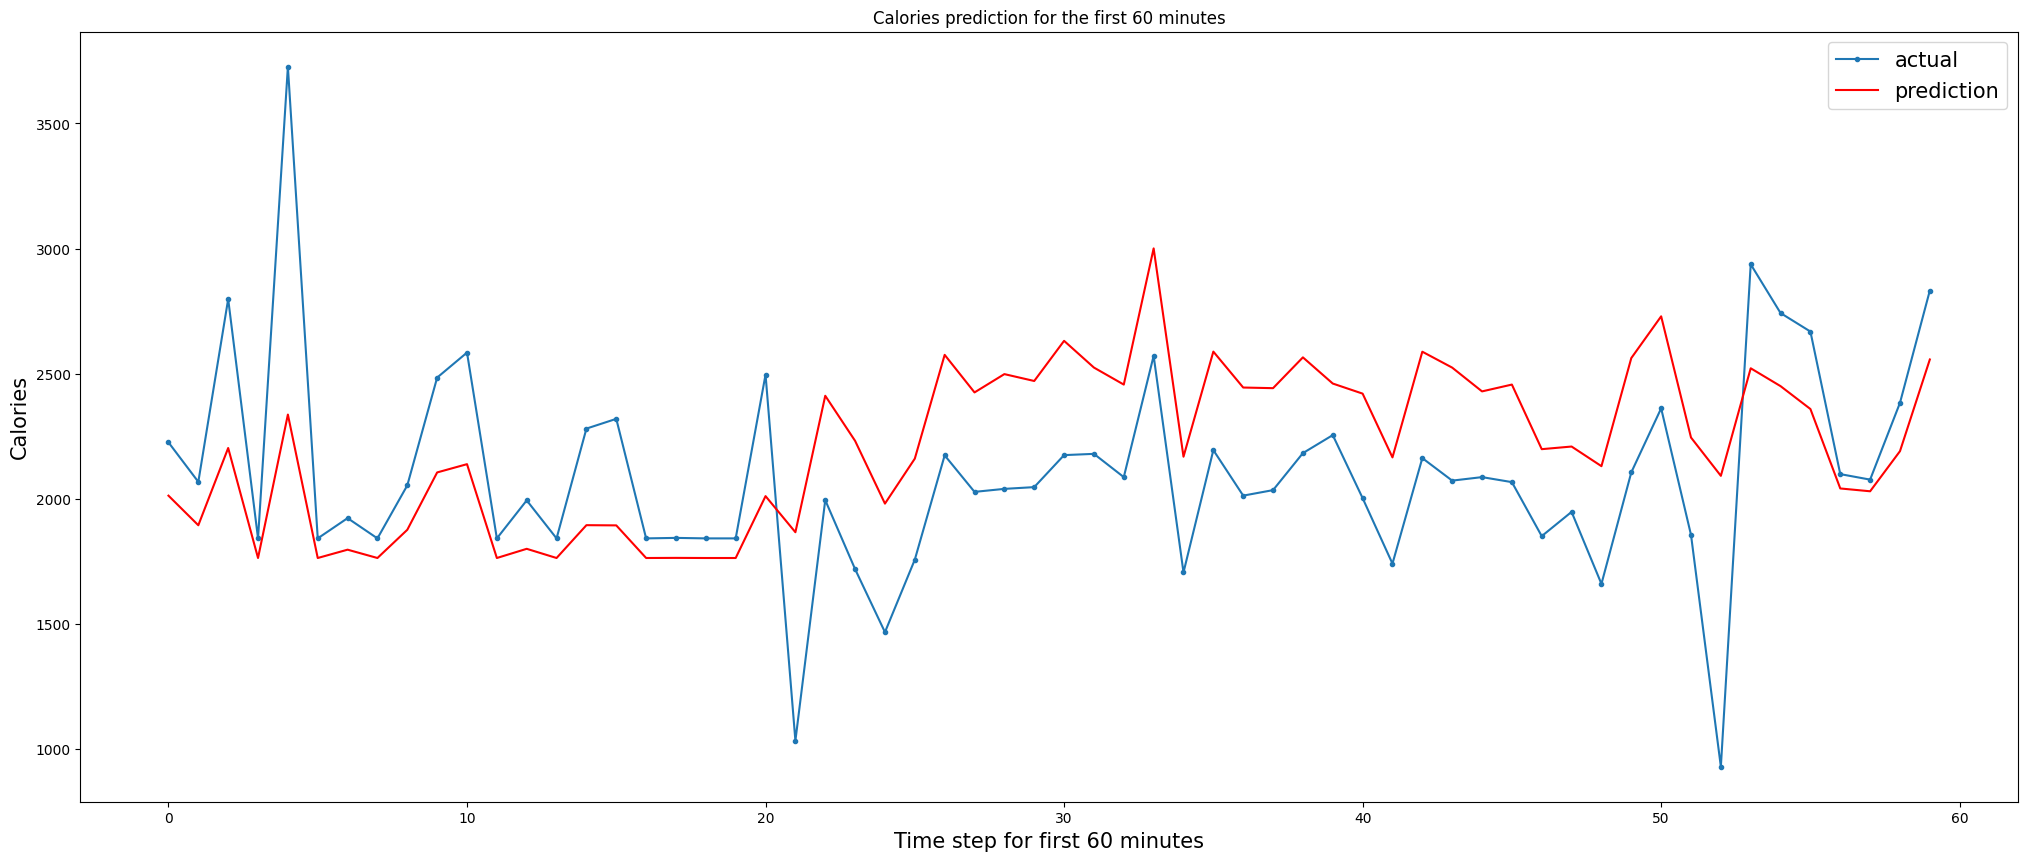

In [232]:
aa=[x for x in range(60)]
plt.figure(figsize=(25,10))
plt.plot(aa, inv_y[:60], marker='.', label="actual")
plt.plot(aa, inv_yhat[:60], 'r', label="prediction")
plt.ylabel(df2.columns[0], size=15)
plt.xlabel('Time step for first 60 minutes', size=15)
plt.title('Calories prediction for the first 60 minutes')
plt.legend(fontsize=15)
plt.show()


In [261]:
# Defining the time intervals in minutes
time_intervals = [30, 60, 80, 90]

# Converting time intervals to the corresponding number of time steps
time_steps_intervals = [interval for interval in time_intervals]

# Calculating the predicted calorie values for each time interval
predicted_calories_intervals = [inv_yhat[time_steps_interval] for time_steps_interval in time_steps_intervals]

# Printing the predicted calorie values for each time interval
for interval, predicted_calories in zip(time_intervals, predicted_calories_intervals):
    print(f'Predicted calories burned for the first {interval} minutes:', predicted_calories)

Predicted calories burned for the first 30 minutes: 2644.768476486206
Predicted calories burned for the first 60 minutes: 2549.700003862381
Predicted calories burned for the first 80 minutes: 2178.5399317741394
Predicted calories burned for the first 90 minutes: 1888.0851238965988
